In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv(r"C:\Users\srita\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


  Senior Citizen is actually a categorical hence the 25%-50% -75% distribution is not propoer
75% customers have tenure less than 55 months
Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.0, 'counts of Churn per categry')

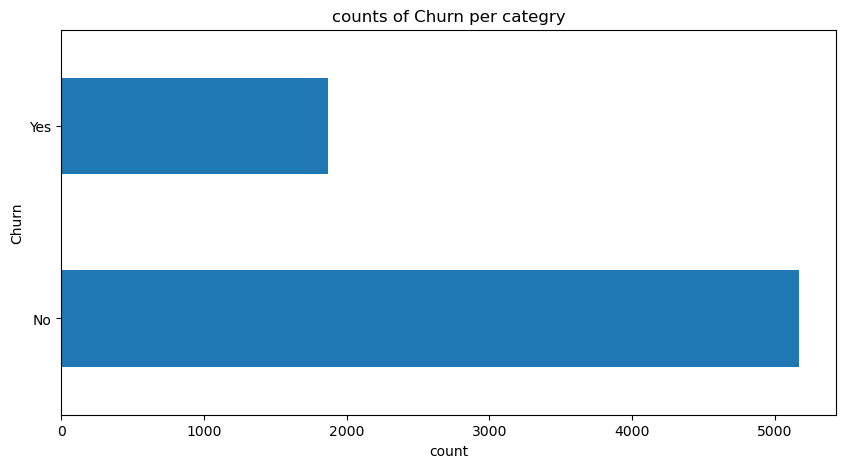

In [8]:
df["Churn"].value_counts().plot(kind="barh",figsize =(10,5))
plt.xlabel("count")
plt.ylabel("Churn")
plt.title("counts of Churn per categry")

In [9]:
(df["Churn"].value_counts()/len(df["Churn"]))*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

# data is highly imbalanced ratio of yes = 73.46

So we analyse the data with other features while taking the target values separately to get some insights.

In [10]:
df.shape[0]

7043

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
missing = pd.DataFrame(df.isnull().sum()*100/len(df)).reset_index()

Text(0.5, 1.0, 'percentage of missing value')

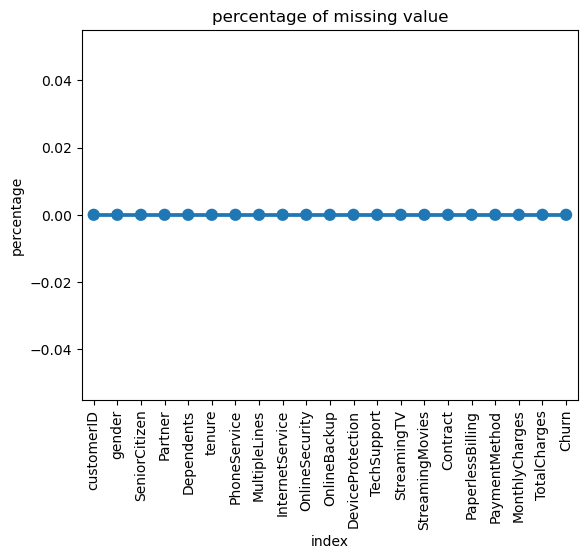

In [13]:
sns.pointplot(x="index",y=0,data=missing)
plt.xticks(rotation=90)
plt.ylabel("percentage")
plt.title("percentage of missing value")

# Missing Data - Initial Intuition 1
• Here, we don't have any missing data.
General Thumb Rules:

• For features with less missing values- can use regression to predict the missing values or fill with the mean of the values
present, depending on the feature.

• For features with very high number of missing values- it is better to drop those columns as they give very less insight on
analysis.

• As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you
can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example,
Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this
column useless, so decisions has to be taken wisely.

# Data Cleaning

In [14]:
telco_data=df.copy()

total charges should be numerical value,so lets convert into numeric datatype

In [15]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors = "coerce")
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [16]:
df["TotalCharges"].isnull().sum()

11

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 as we can see there are 11 missing value in totalcharges,lets see the record

In [18]:
df[df["TotalCharges"].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
# checking percentage of totalcharges
df["TotalCharges"].isnull().sum()/len(df)*100

0.1561834445548772

#  missing value treatment

since the % of these rercords compared to total dataset is very low ie 0.15%, it is safe to ignore them for futher processing

In [20]:
#  removing the missig value
df.dropna(inplace= True)
#or
# df["TotalCharges"]=df["TotalCharges"].dropna().isnull().sum()
# df["TotalCharges"].isnull().sum()

 Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1
to 2 Yrs, tenure group of 13-24; so on...

In [21]:
# get the max tenure
print(df["tenure"].max())

72


In [22]:
# group the tenure in bins of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [23]:
df["tenure_group"] = pd.cut(df.tenure,range(1,80,12),right = False,labels= labels)
df["tenure_group"].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [24]:
# removes columns customerid and tenure
# drop column customerid and tenure
df.drop(columns=["customerID","tenure"],axis=1,inplace=True)
 

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# data exploration

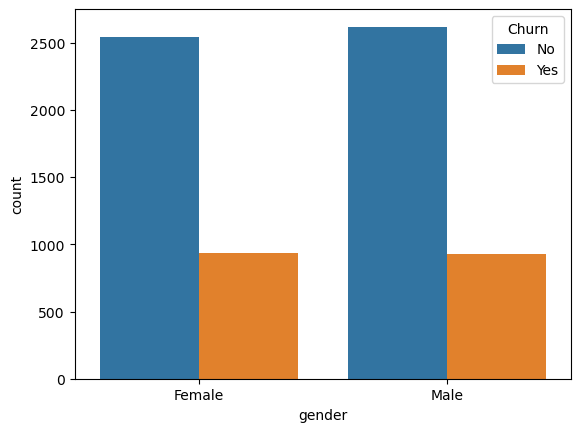

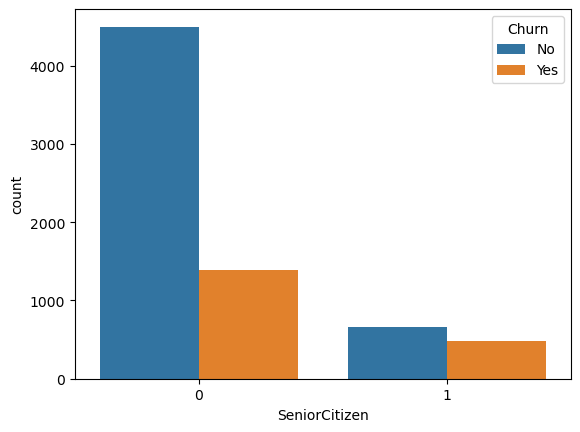

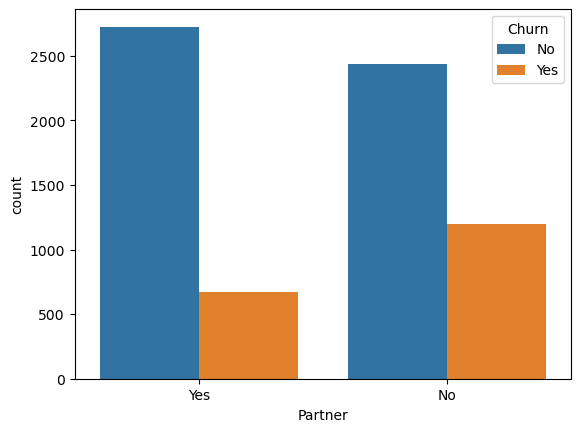

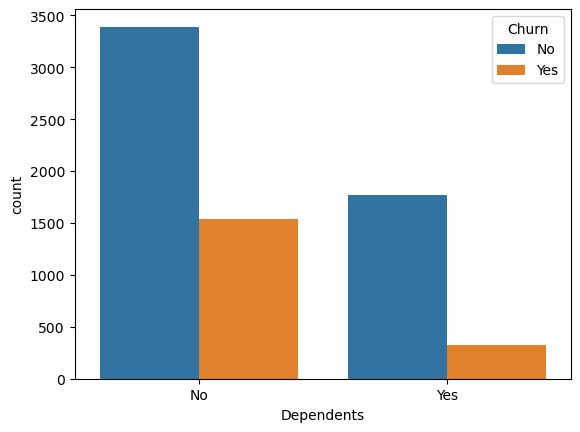

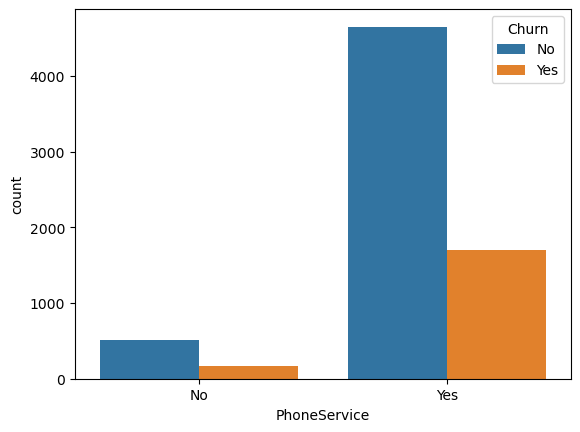

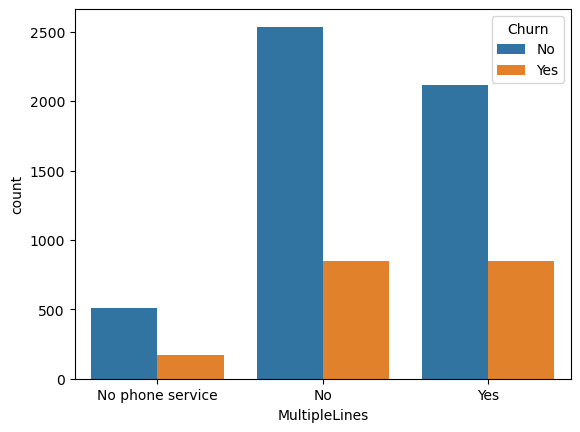

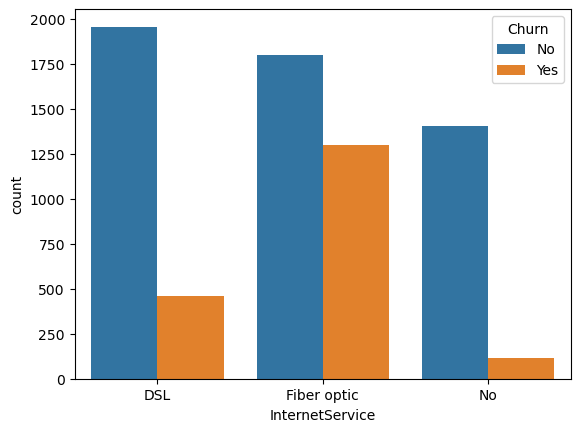

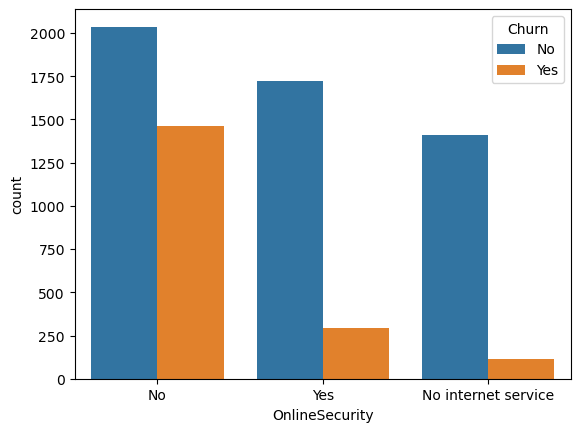

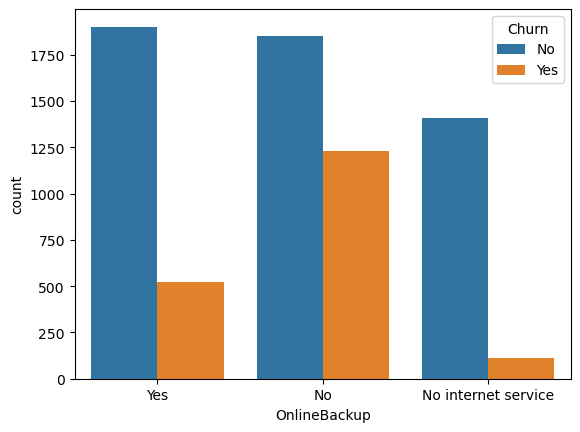

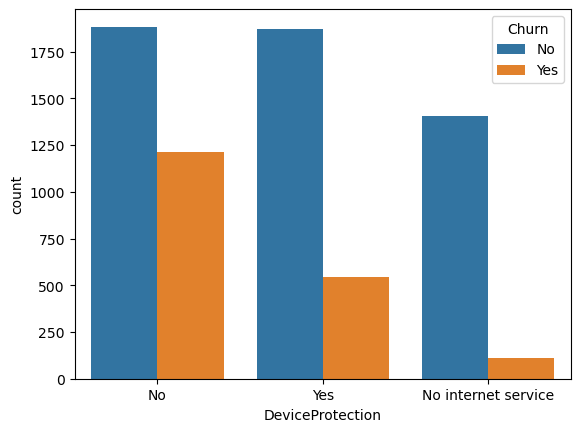

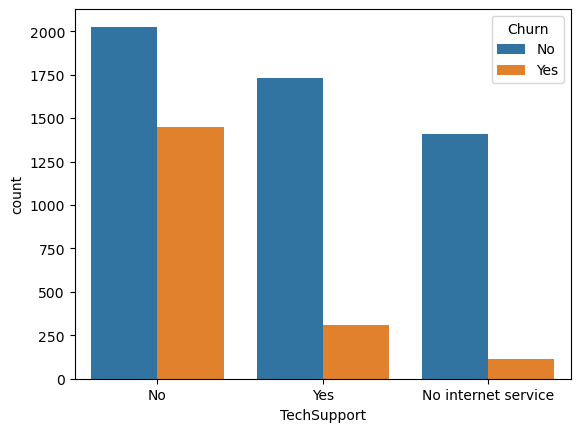

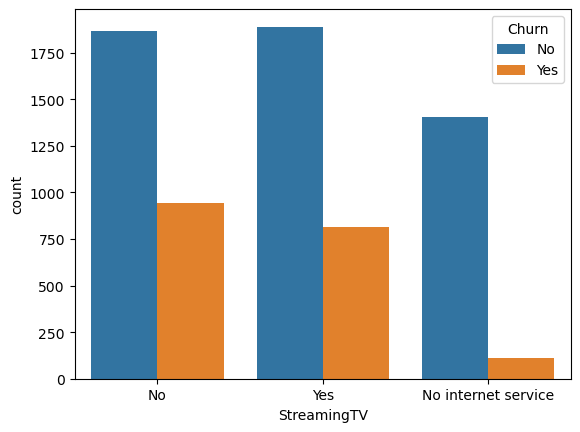

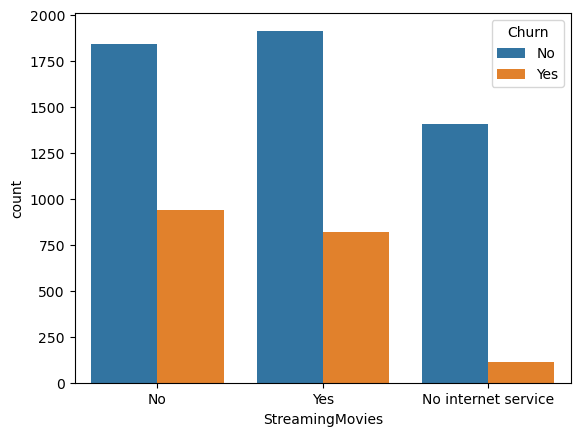

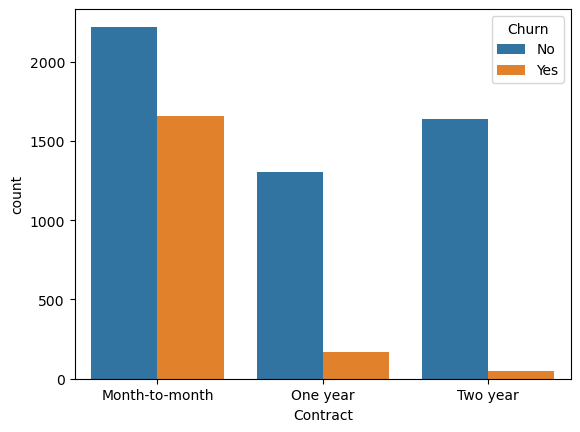

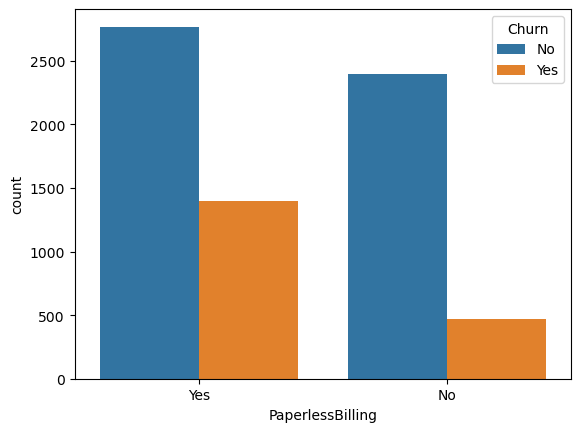

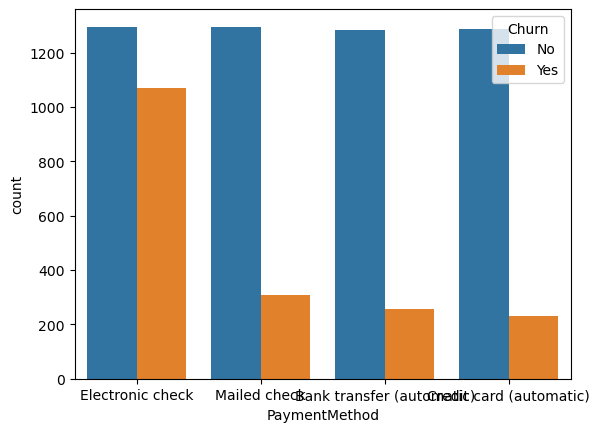

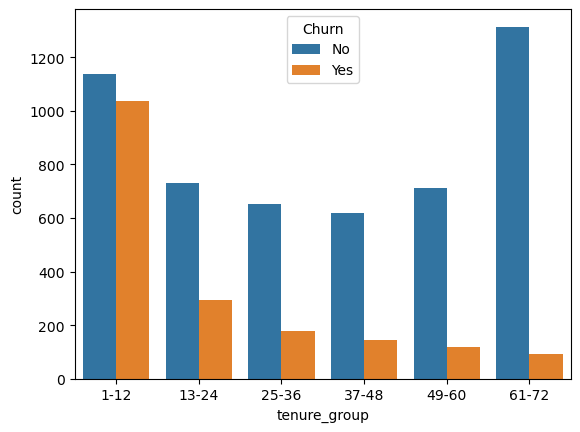

In [26]:
# univariate analysis
for i ,predictor in enumerate(df.drop(columns=["Churn","TotalCharges","MonthlyCharges"])):
    plt.figure(i)
    sns.countplot(data=df,x = predictor,hue="Churn")

convert the targetvariable "Churn" in a binary numeric variable i.e yes=1,no=0 

In [27]:
df["Churn"] = np.where(df.Churn == "Yes",1,0 )

In [28]:
df.head() 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


converting all the categorical variable into numerical variable

In [29]:
df1 = pd.get_dummies(df,dtype=int)

# telco_data_dummies=telco_data_dummies.astype(int)

In [30]:
 df1.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between monthly charges and total charges

C:\Users\srita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


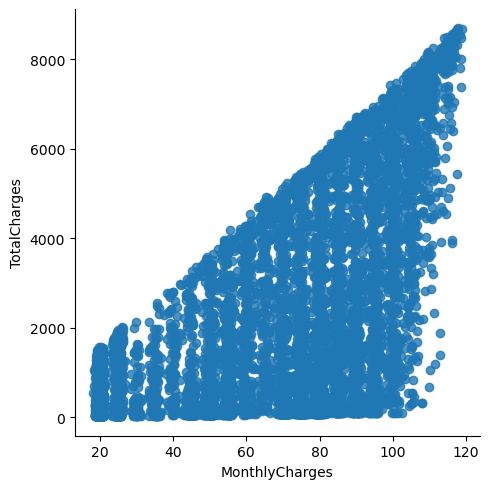

In [31]:
sns.lmplot(data = df1,x ="MonthlyCharges",y ="TotalCharges",fit_reg = False)

Text(0.5, 1.0, 'Monthly charges\xa0by\xa0churn')

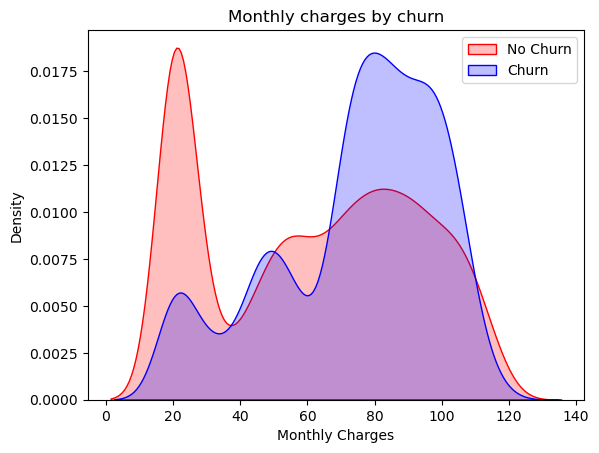

In [32]:
# # churn by monthly charges and total
Mth = sns.kdeplot(df1.MonthlyCharges[(df1['Churn']==0)],color = 'Red',fill=True)
Mth = sns.kdeplot(df1.MonthlyCharges[(df1['Churn']==1)],color = 'Blue',fill=True,ax=Mth)
Mth.legend (["No Churn", "Churn" ], loc= 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

churn is high when monthly charges is high

Text(0.5, 1.0, 'Total charges by churn')

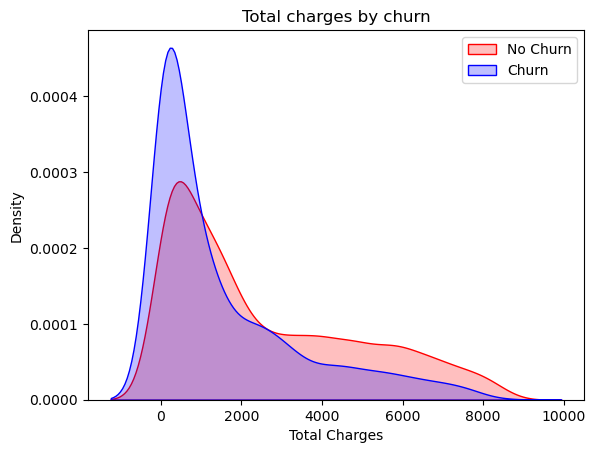

In [33]:
Tot = sns.kdeplot(df1. TotalCharges [(df1 ["Churn"] == 0) ],color="Red", fill = True)
Tot = sns.kdeplot (df1. TotalCharges [(df1 ["Churn"] == 1) ],ax = Tot, color="Blue", fill= True)
Tot. legend (["No Churn", "Churn" ], loc= 'upper right')
Tot. set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear
:- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence. all these 3 factors viz Higher Monthly
Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

<Axes: >

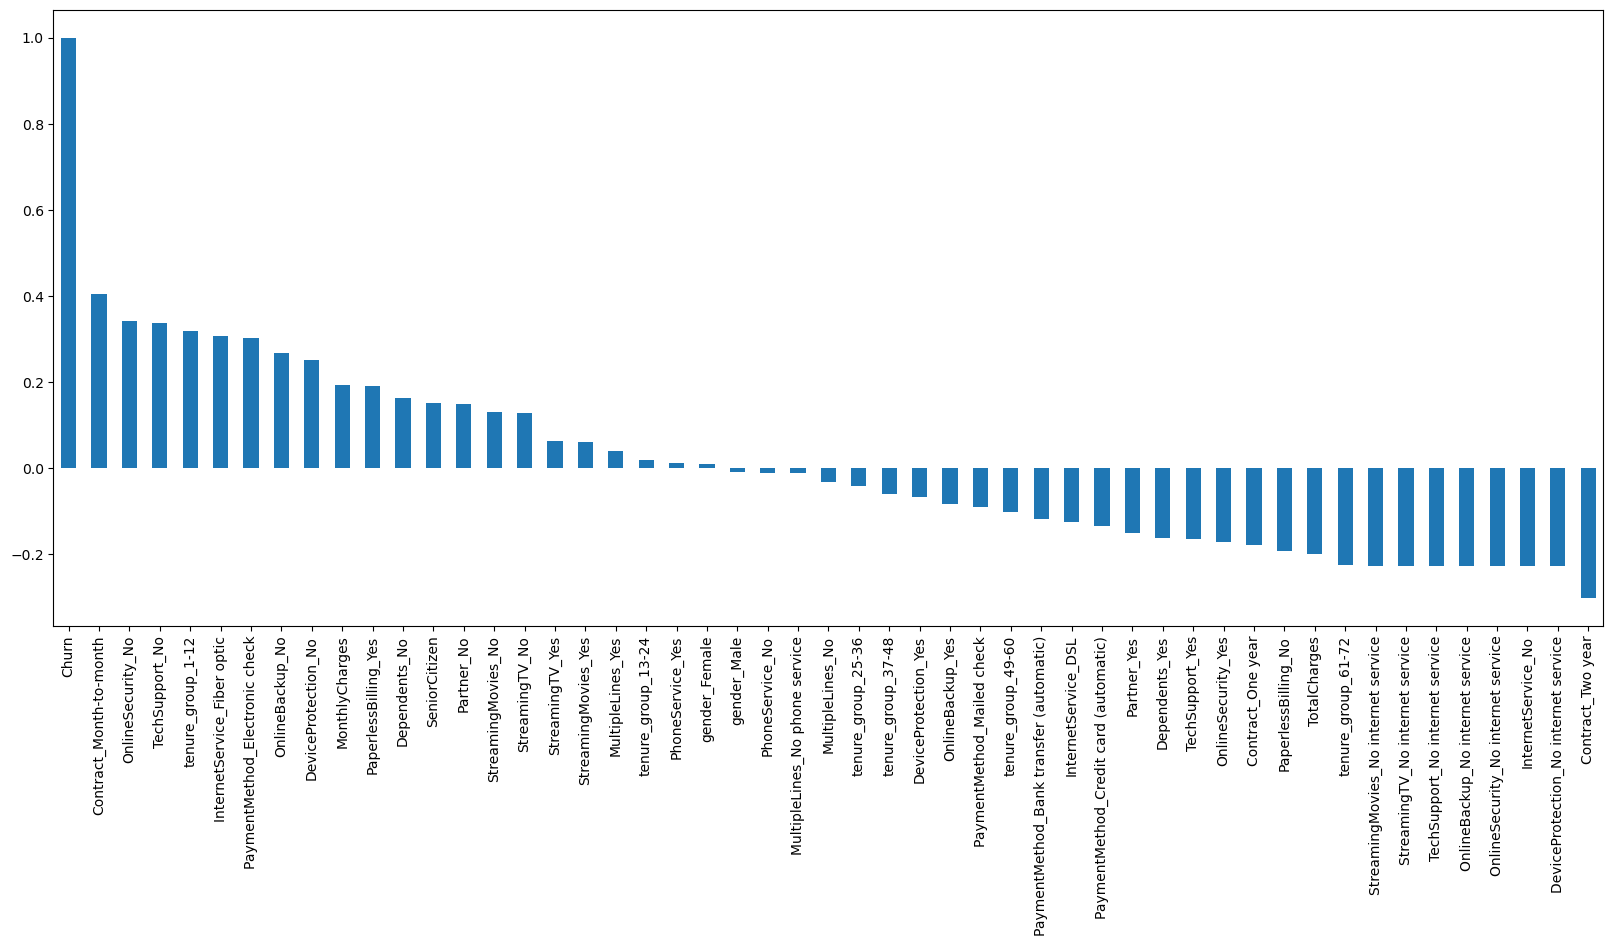

In [34]:
# built a corelation of all predictors with churn
plt.figure(figsize=(20,8))
df1.corr()["Churn"].sort_values(ascending = False).plot(kind ="bar")

<Axes: >

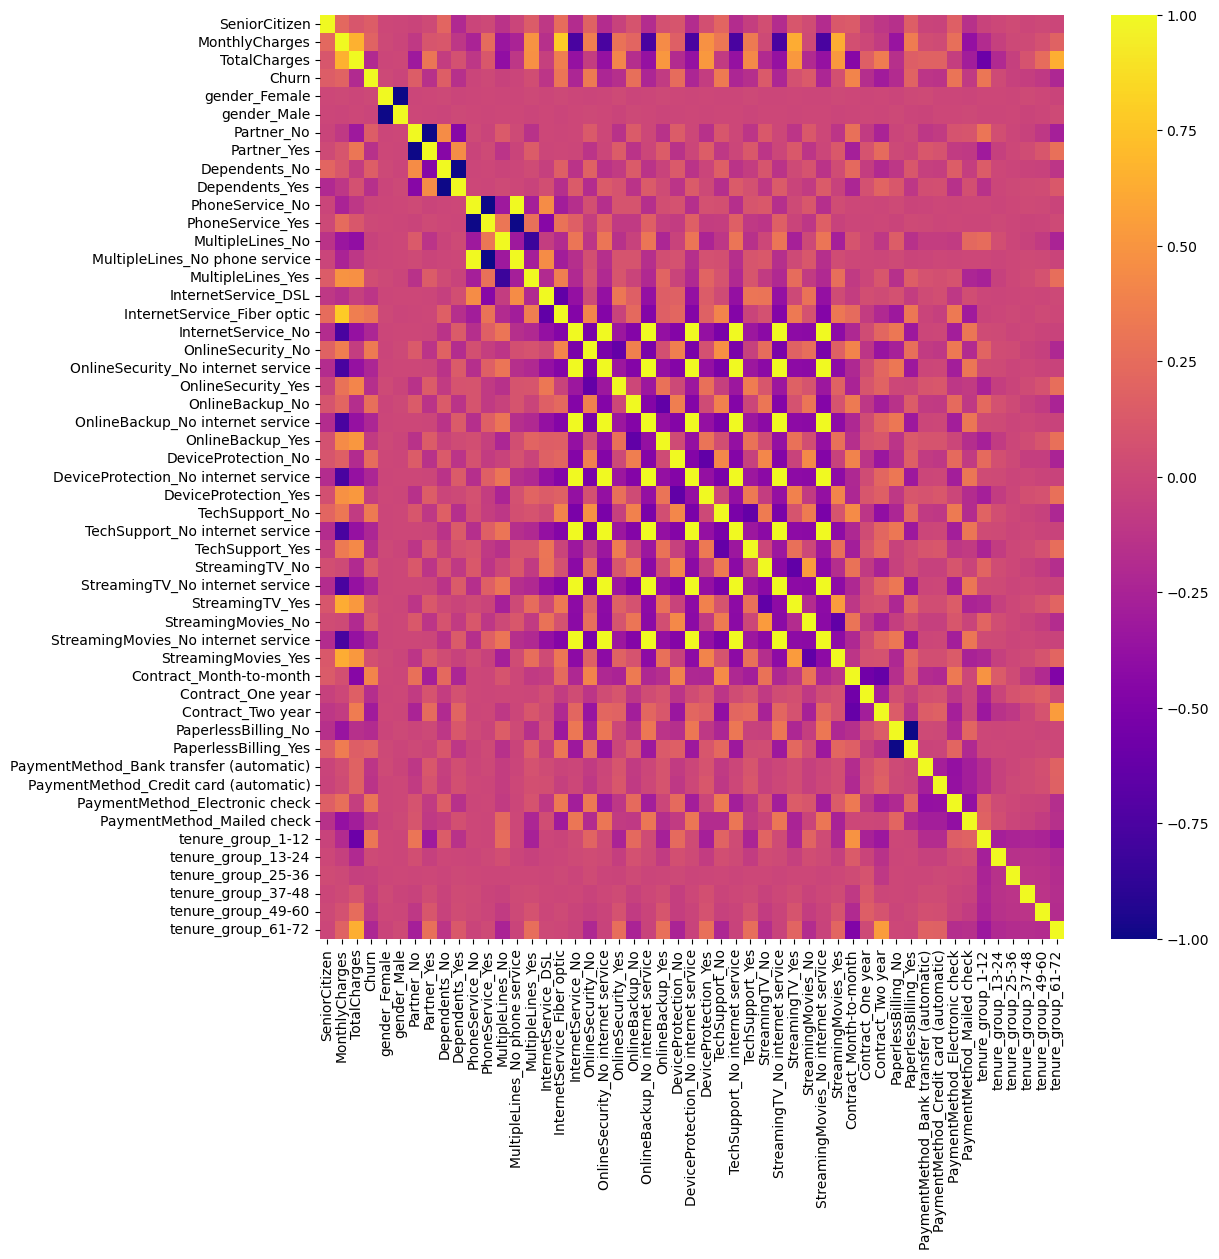

In [35]:
plt.figure(figsize =(12,12))
sns.heatmap(df1.corr(), cmap ="plasma")

# bivariate analysis

In [36]:
 df1_target0 = df.loc[df["Churn"]==0]
 df1_target1 = df.loc[df["Churn"]==1]

In [37]:
def uniplot(df,col,title,hue = None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data = hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches (width, 8)
    plt.xticks (rotation=45)
    plt.yscale ('log')
    plt.title(title)
    ax = sns.countplot (data = df, x= col, order=df [col].value_counts().index, hue = hue, palette='bright')
    plt.show()

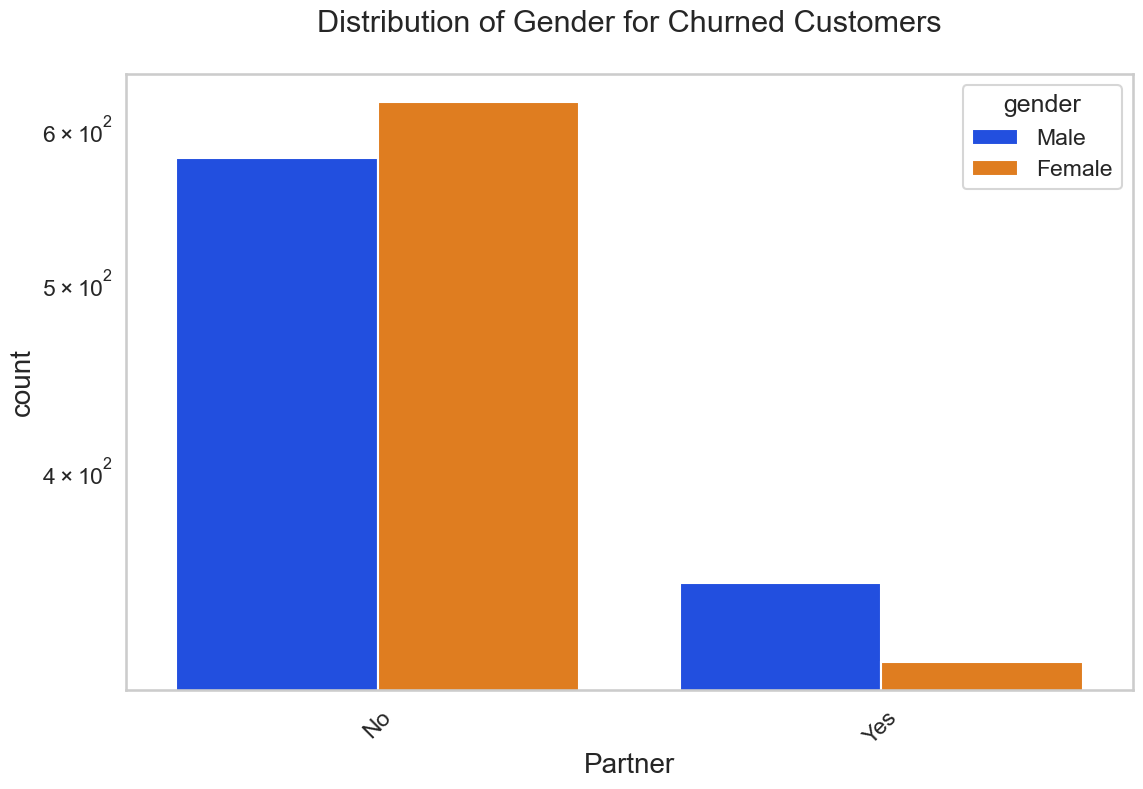

In [38]:
uniplot(df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

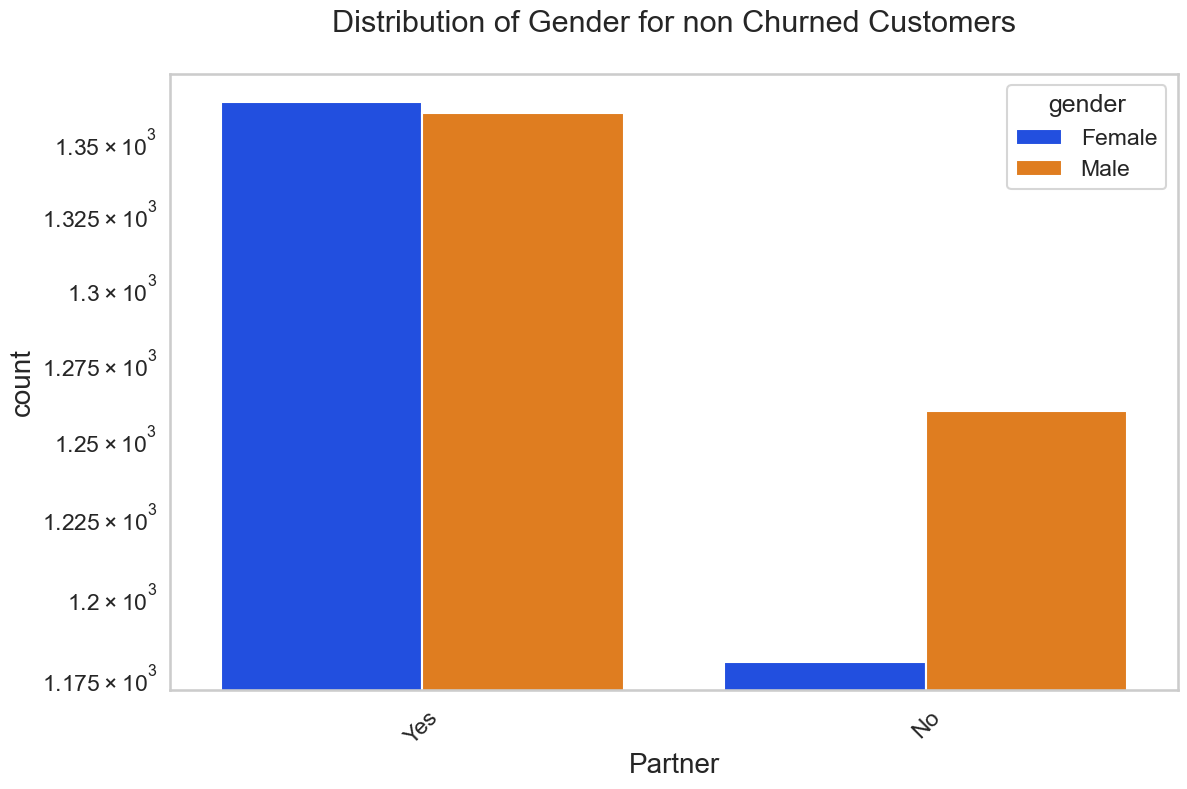

In [39]:
uniplot(df1_target0, col='Partner', title='Distribution of Gender for non Churned Customers', hue='gender')

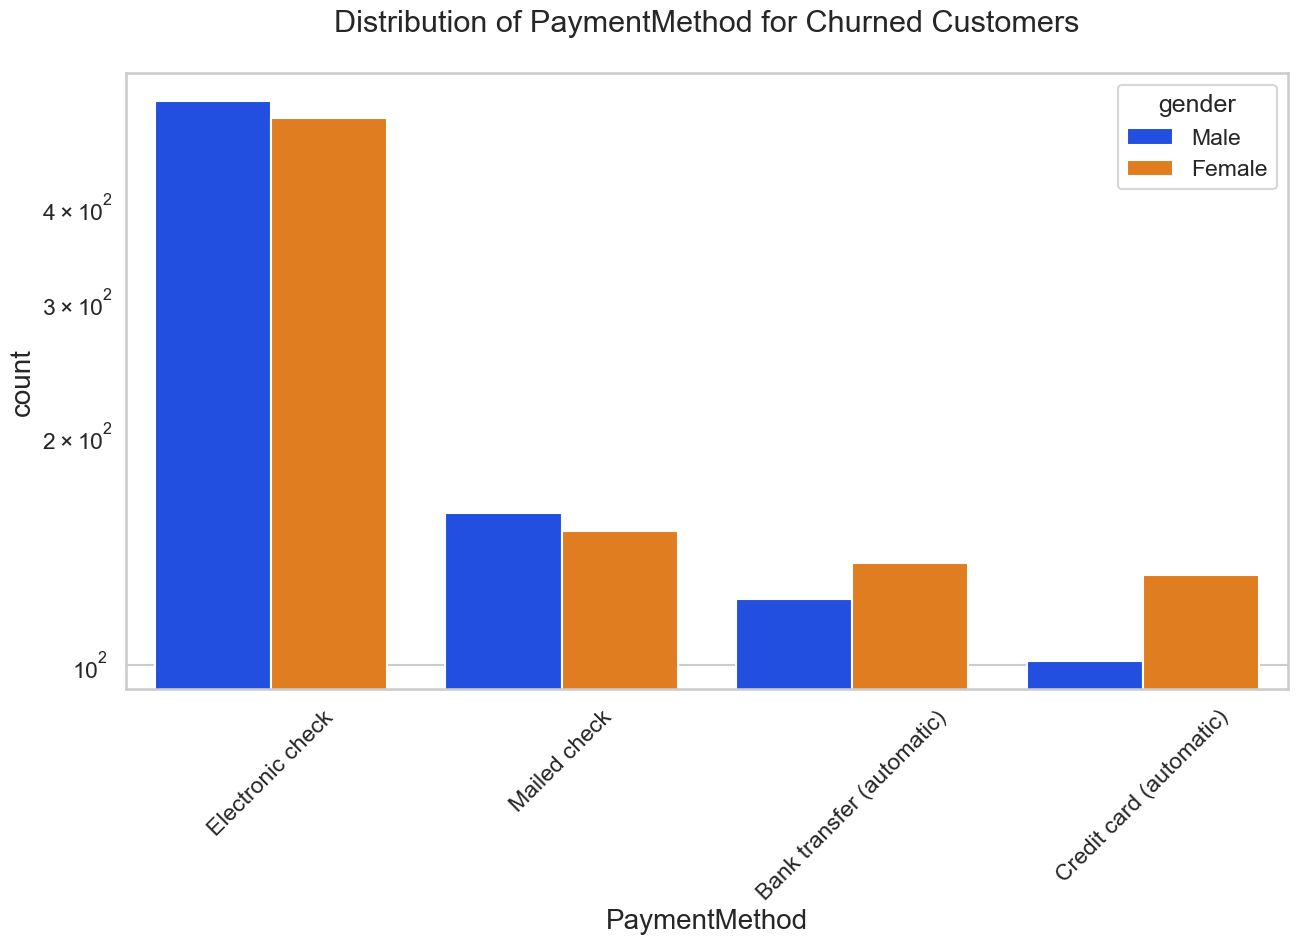

In [40]:
uniplot(df1_target1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers', hue='gender')

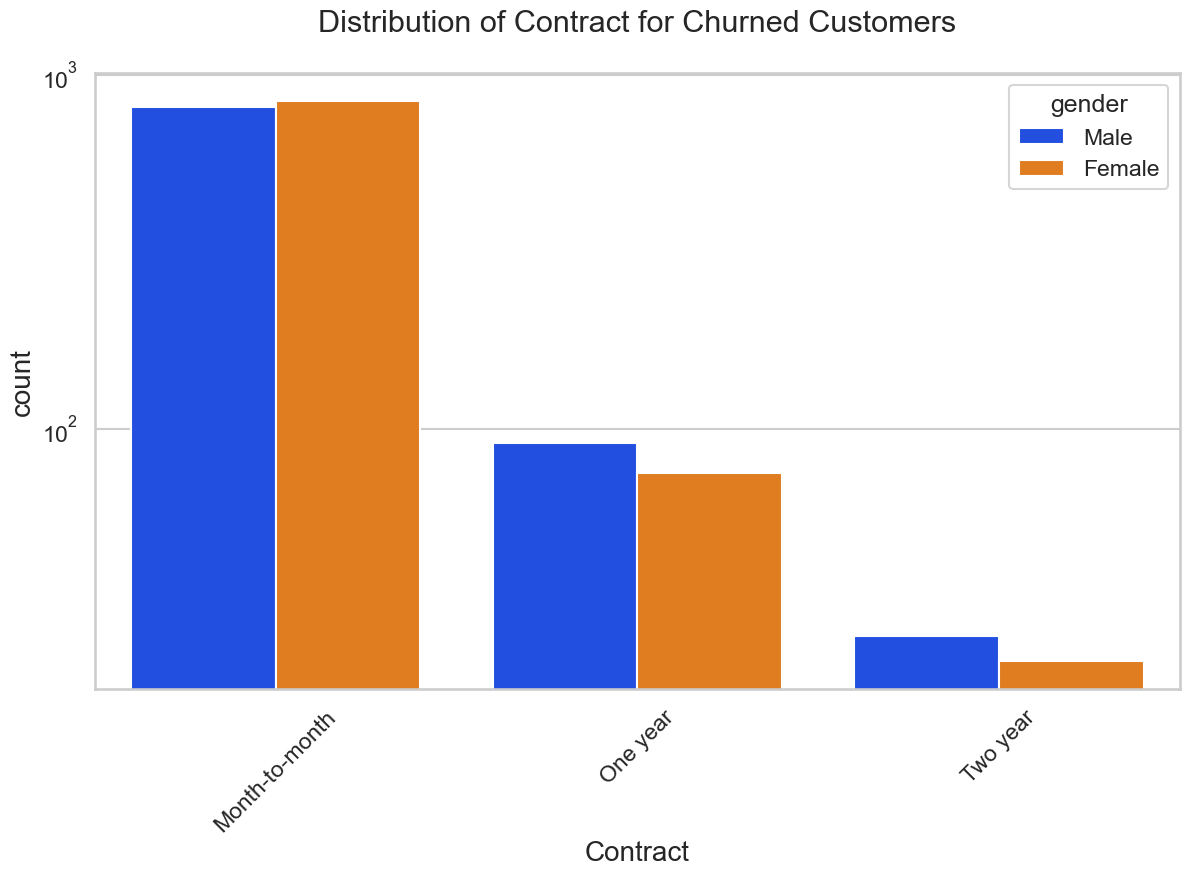

In [41]:
uniplot(df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

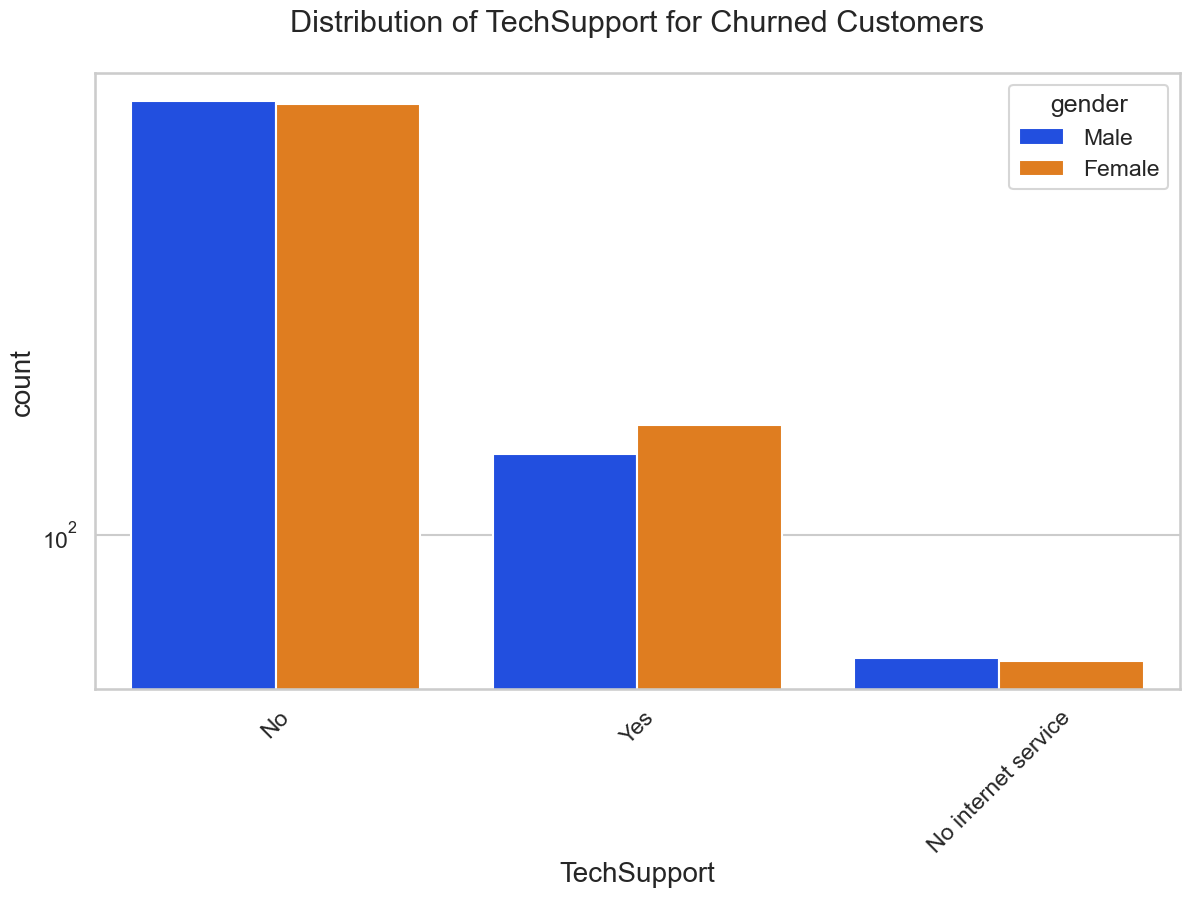

In [42]:
uniplot(df1_target1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

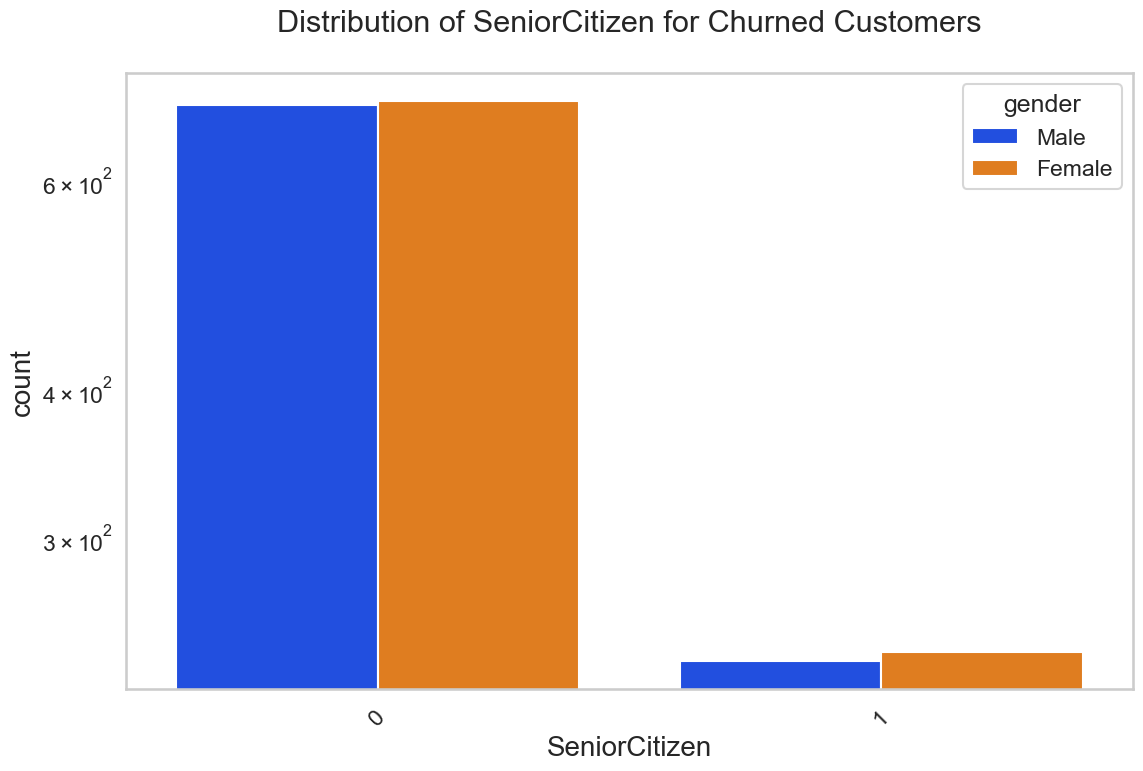

In [43]:
uniplot(df1_target1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

# CONCLUSION
These are some of the quick insights from this exercise:
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners


In [44]:
df1.to_csv("tel_churn.csv")

# MODEL BUILDING

In [45]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [46]:
df = pd.read_csv("tel_churn.csv")

In [47]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [48]:
df = df.drop("Unnamed: 0",axis = 1)

In [49]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [50]:
# creating x(independent) and y (dependent) variable
x = df.drop("Churn",axis = 1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [51]:
y = df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [52]:
# convert the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Decision tree classifier

In [53]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state= 6,min_samples_leaf=8)

In [54]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8, random_state=6)

In [55]:
y_pred = model_dt.predict(x_test)

In [56]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.54      0.56       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



In [58]:
model_dt.score(x_train,y_train)

0.8592

In [59]:
model_dt.score(x_test,y_test)

0.7718550106609808

this is not a overfiting cae


In [60]:
print(confusion_matrix(y_test,y_pred))

[[885 148]
 [173 201]]


In [61]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [62]:
from imblearn.combine import SMOTEENN

In [63]:
sm = SMOTEENN()
x_resampled,y_resampled = sm.fit_resample(x,y)

In [64]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_resampled,y_resampled,test_size = 0.2)

In [65]:
model_dt_smote = DecisionTreeClassifier(criterion = "gini",random_state= 6,min_samples_leaf=8)

In [66]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(min_samples_leaf=8, random_state=6)

In [67]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [68]:
print(classification_report(yr_test,y_pred_smote , labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       543
           1       0.93      0.91      0.92       627

    accuracy                           0.91      1170
   macro avg       0.91      0.91      0.91      1170
weighted avg       0.91      0.91      0.91      1170



In [69]:
from sklearn.metrics import accuracy_score

In [70]:
print(accuracy_score(yr_test,y_pred_smote)*100)

91.45299145299145


In [71]:
print(confusion_matrix(yr_test,y_pred_smote))

[[497  46]
 [ 54 573]]


# random forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model_rf = RandomForestClassifier(n_estimators = 100,criterion = "gini",random_state= 6,min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [74]:
print(classification_report(y_test,y_pred_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.50      0.58       374

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [75]:
from imblearn.combine import SMOTEENN

In [76]:
sm = SMOTEENN()
x_resampled_rf,y_resampled_rf   = sm.fit_resample(x,y)

In [77]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_resampled,y_resampled,test_size = 0.2)

In [78]:
model_dt_rf = RandomForestClassifier(criterion = "gini",random_state= 6,min_samples_leaf=8)

In [79]:
model_dt_rf.fit(xr_train,yr_train)

RandomForestClassifier(min_samples_leaf=8, random_state=6)

In [80]:
y_pred_rf = model_dt_smote.predict(xr_test)

In [81]:
print(classification_report(yr_test,y_pred_rf , labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       542
           1       0.96      0.95      0.96       628

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170



In [82]:
print(confusion_matrix(yr_test,y_pred_rf))

[[519  23]
 [ 33 595]]


In [83]:
from sklearn.metrics import accuracy_score

In [84]:
print(accuracy_score(yr_test,y_pred_rf)*100)

95.2136752136752


# save the model

In [86]:
import pickle 